# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.4.1
xgboost 1.5.2


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-03-16 08:23:48--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.33.210.24, 13.33.210.110, 13.33.210.126, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.33.210.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109895 (107K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 107.32K  --.-KB/s    in 0.05s   

2022-03-16 08:23:48 (2.15 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [109895/109895]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(789, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-10,61083,2025,577,275,693,204,260,514,1539,546,...,341,206,2876,319,357,719,291,250,336,649
2022-03-11,55827,1644,592,263,609,190,218,407,1666,482,...,289,223,2669,286,338,682,298,252,337,744
2022-03-12,55240,1701,524,253,771,213,273,430,1748,544,...,302,164,2523,315,310,645,264,245,395,679
2022-03-13,50870,1441,430,221,544,181,247,345,1553,521,...,225,178,2130,171,226,435,226,223,280,574
2022-03-14,32377,1042,350,174,269,100,136,232,1258,314,...,155,121,1690,283,134,421,184,135,203,262


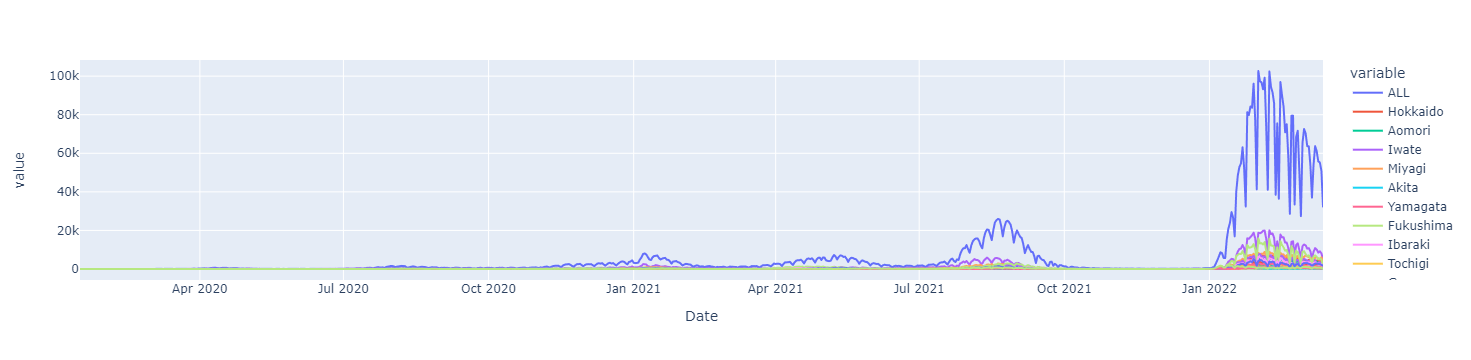

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(113, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-13,75632.000000,2609.142857,337.571429,163.285714,675.000000,175.714286,145.857143,394.857143,1210.285714,588.428571,...,204.285714,231.000000,2864.714286,432.142857,335.571429,742.428571,425.000000,265.571429,527.857143,559.000000
2022-02-20,73103.428571,2512.857143,338.571429,234.857143,757.285714,179.714286,134.428571,323.000000,1339.142857,657.142857,...,221.285714,206.857143,2521.857143,396.571429,249.714286,694.571429,320.571429,220.857143,475.857143,604.428571
2022-02-27,58839.571429,2092.857143,352.714286,302.571429,615.857143,202.857143,122.571429,270.857143,1223.571429,542.285714,...,200.285714,149.857143,2061.857143,321.285714,243.142857,581.571429,285.000000,206.000000,433.000000,623.714286
2022-03-06,59555.428571,1758.000000,448.142857,267.000000,633.428571,212.000000,179.714286,318.857143,1326.714286,576.285714,...,278.142857,186.285714,2531.714286,322.142857,328.000000,584.000000,327.714286,218.142857,407.571429,807.571429
2022-03-13,53955.428571,1604.428571,482.857143,243.857143,629.000000,197.428571,240.714286,416.428571,1416.142857,521.857143,...,278.571429,188.714286,2440.000000,307.285714,314.571429,649.142857,275.714286,220.000000,348.142857,647.285714


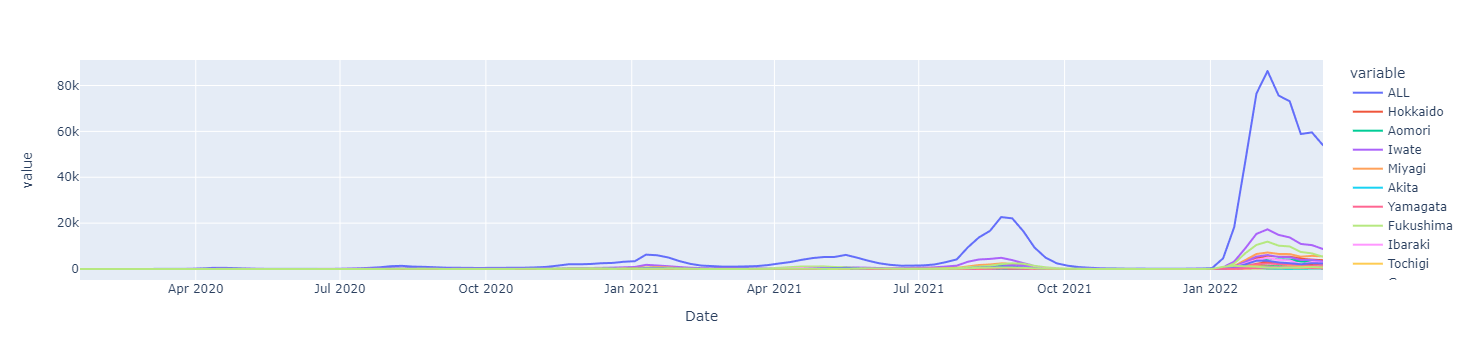

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.000922,0.003157,0.001293,0.000446,0.000525,0.000388,0.000182,0.000125,0.000022,0.000002,0.000010,0.000002,0.000000,2020.0,6.0,26.0
2020-07-05,0.002104,0.005755,0.003157,0.001293,0.000446,0.000525,0.000388,0.000182,0.000125,0.000022,0.000002,0.000010,0.000002,2020.0,7.0,27.0
2020-07-12,0.003496,0.005738,0.005755,0.003157,0.001293,0.000446,0.000525,0.000388,0.000182,0.000125,0.000022,0.000002,0.000010,2020.0,7.0,28.0
2020-07-19,0.005578,0.004398,0.005738,0.005755,0.003157,0.001293,0.000446,0.000525,0.000388,0.000182,0.000125,0.000022,0.000002,2020.0,7.0,29.0
2020-07-26,0.008565,0.002720,0.004398,0.005738,0.005755,0.003157,0.001293,0.000446,0.000525,0.000388,0.000182,0.000125,0.000022,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,NaN,0.876222,1.000000,0.885224,0.544238,0.211662,0.053874,0.004476,0.002596,0.001720,0.001329,0.001296,0.001041,2022.0,5.0,18.0
2022-05-15,NaN,0.846927,0.876222,1.000000,0.885224,0.544238,0.211662,0.053874,0.004476,0.002596,0.001720,0.001329,0.001296,2022.0,5.0,19.0
2022-05-22,NaN,0.681675,0.846927,0.876222,1.000000,0.885224,0.544238,0.211662,0.053874,0.004476,0.002596,0.001720,0.001329,2022.0,5.0,20.0
2022-05-29,NaN,0.689969,0.681675,0.846927,0.876222,1.000000,0.885224,0.544238,0.211662,0.053874,0.004476,0.002596,0.001720,2022.0,5.0,21.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(102, 15) (102,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

(80, 15) (80,)
CPU times: user 881 ms, sys: 17.3 ms, total: 899 ms
Wall time: 132 ms


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



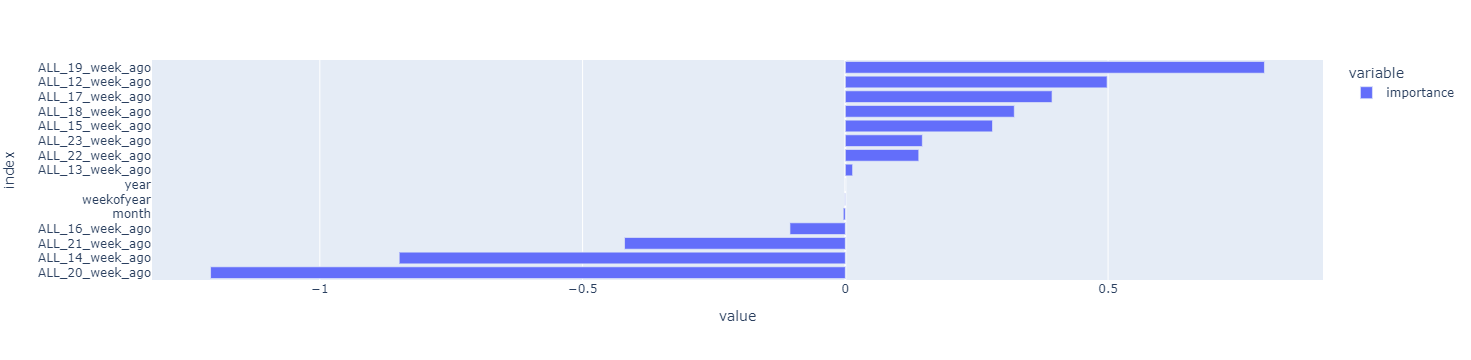

In [13]:
%%time

train_last_date = '2022-01-02'
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 5024.3


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



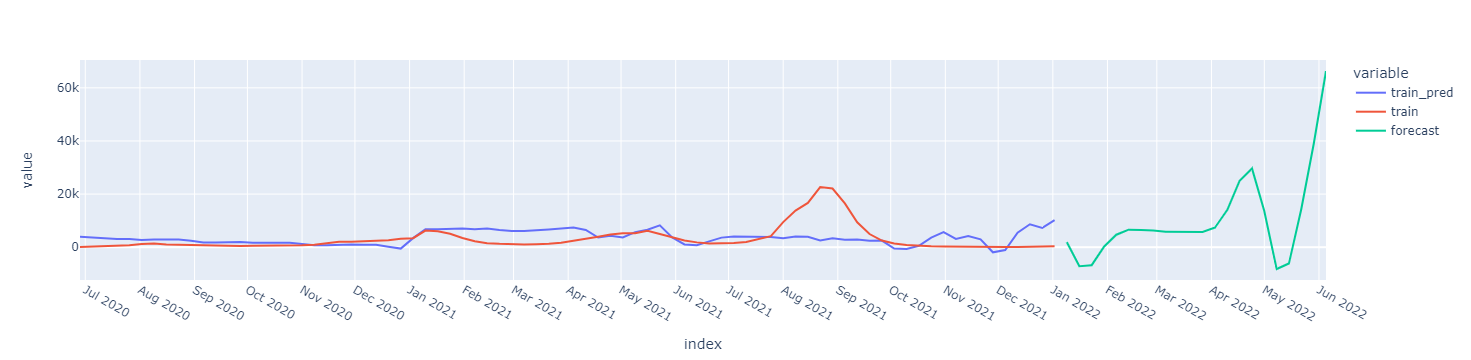

In [14]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()